In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pystan
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [3]:
df=pd.read_excel("./data/data.xlsx")[[0]]

(array([ 1.,  1.,  5., 12., 10., 18., 16.,  8.,  5.,  4.]),
 array([2.29193477, 2.77510498, 3.25827519, 3.74144541, 4.22461562,
        4.70778584, 5.19095605, 5.67412627, 6.15729648, 6.64046669,
        7.12363691]),
 <a list of 10 Patch objects>)

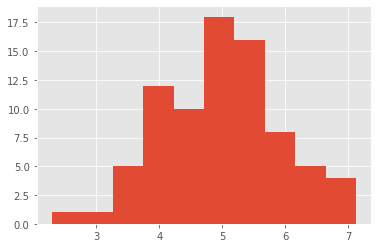

In [4]:
plt.hist(df[0])

In [5]:
stan_model="""
data{
    int N;
    real Y[N];
}

parameters{
    real mu;
    real <lower=0> sigma;
}

model{
    for (i in 1:N){
        Y[i] ~ normal(mu, sigma);
    }
}


"""

In [7]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_07694b4922469a25e9be612902643a13 NOW.


In [8]:
stan_data={"N":df.shape[0], "Y":df[0]}

In [13]:
fit = sm.sampling(data=stan_data, iter=2000, chains=3, warmup=500, seed=123)

In [14]:
fit

Inference for Stan model: anon_model_07694b4922469a25e9be612902643a13.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      4.98  1.8e-3   0.11   4.76   4.91   4.98   5.05   5.19   3601    1.0
sigma   0.97  1.4e-3   0.08   0.83   0.92   0.97   1.02   1.14   3220    1.0
lp__  -37.06    0.02   1.01 -39.68 -37.45 -36.75 -36.35  -36.1   2071    1.0

Samples were drawn using NUTS at Thu Oct 10 10:37:46 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

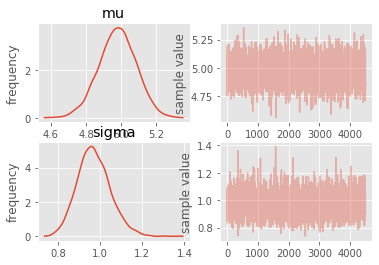

In [15]:
fig=fit.plot()